In [43]:
import pandas as pd
import numpy as np
import matplotlib ;  import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.decomposition import PCA
import statsmodels.api as sm

# ARIMA
from statsmodels.tsa.arima.model import ARIMA
# auto_arima
from pmdarima import auto_arima
%matplotlib inline

In [2]:
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

## 주성분 분석(PCA)

In [3]:
df_raw = pd.read_csv("../실습파일/2. Big Data 분석/IRIS.csv")
df_raw.head(150)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
species_mapping = {'setosa':0, 'versicolor':1 ,'virginica':2}
df_raw['SPECIES'] = df_raw['SPECIES'].map(species_mapping)
df_raw

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


목표 변수인 SPECIES를 모델에 넣어주기 위해서 숫자형으로 변경했다

In [5]:
df_raw_x = df_raw.drop("SPECIES",axis=1)
df_raw_y = df_raw["SPECIES"]
df_raw_y


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: SPECIES, Length: 150, dtype: int64

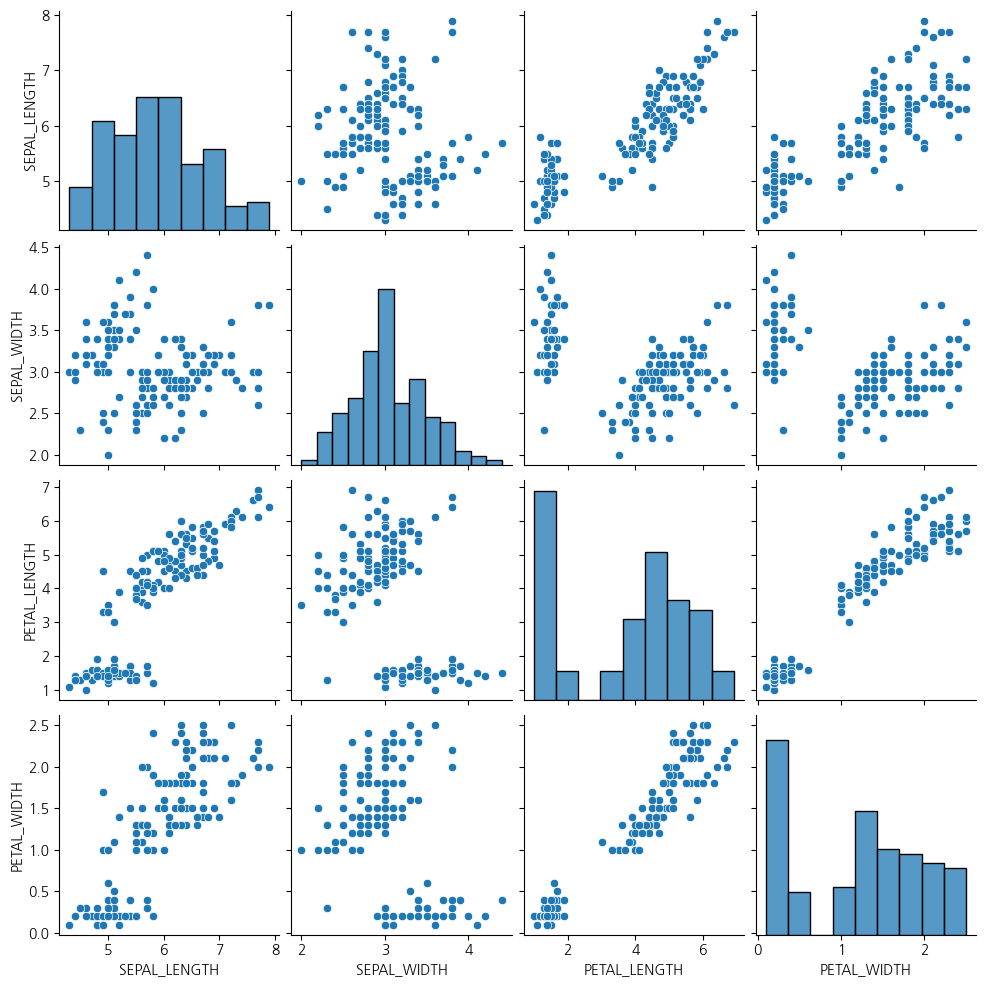

In [6]:
sns.pairplot(df_raw_x)

In [7]:
df_raw_x.corr().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
SEPAL_LENGTH,1.000,-0.118,0.872,0.818
SEPAL_WIDTH,-0.118,1.000,-0.428,-0.366
PETAL_LENGTH,0.872,-0.428,1.000,0.963
PETAL_WIDTH,0.818,-0.366,0.963,1.000


상관관계를 따졌을 때 PETAL_LENGTH와 PETAL_WIDTH의 상관관계가 0.963으로 높게 나타났으며 PETAL_LENGTH와 SEPAL_LENGTH 또한 높은 상관관계를 보였다.

In [8]:
df_raw_x.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [9]:
x_cols = df_raw_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
print("Scaled Data :\n {}".format(nd_scaled[:5].round(3)))
print("Shape :\n {}".format(nd_scaled.shape))

Scaled Data :
 [[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
Shape :
 (150, 4)


In [10]:
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols ) 
df_scaled.head().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,-0.901,1.019,-1.340,-1.315
1,-1.143,-0.132,-1.340,-1.315
2,-1.385,0.328,-1.397,-1.315
3,-1.507,0.098,-1.283,-1.315
4,-1.022,1.249,-1.340,-1.315


In [11]:
df_scaled.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,-0.000,-0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.434,-1.568,-1.447
25%,-0.901,-0.592,-1.227,-1.184
50%,-0.053,-0.132,0.336,0.133
75%,0.675,0.559,0.763,0.791
max,2.492,3.091,1.786,1.712


In [12]:
pca = PCA(n_components=4)
nd_pca = pca.fit_transform(df_scaled)

print("PCA Data :\n {}".format(nd_pca[:5]))
print("Shape :\n {}".format(nd_pca.shape))

PCA Data :
 [[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]
 [-2.08096115 -0.67413356 -0.23460885 -0.10300677]
 [-2.36422905 -0.34190802  0.04420148 -0.02837705]
 [-2.29938422 -0.59739451  0.09129011  0.06595556]
 [-2.38984217  0.64683538  0.0157382   0.03592281]]
Shape :
 (150, 4)


In [13]:
df_pca = pd.DataFrame(nd_pca, columns = ["Prin1","Prin2","Prin3","Prin4"])

df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,Prin1,Prin2,Prin3,Prin4
0,-0.900681,1.019004,-1.340227,-1.315444,-2.264703,0.480027,-0.127706,-0.024168
1,-1.143017,-0.131979,-1.340227,-1.315444,-2.080961,-0.674134,-0.234609,-0.103007
2,-1.385353,0.328414,-1.397064,-1.315444,-2.364229,-0.341908,0.044201,-0.028377
3,-1.506521,0.098217,-1.283389,-1.315444,-2.299384,-0.597395,0.091290,0.065956
4,-1.021849,1.249201,-1.340227,-1.315444,-2.389842,0.646835,0.015738,0.035923


In [14]:
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [I for I in range(1,5)]
df_pca_stat["EigenValues"] = pca.explained_variance_ 
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_ 
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,2.938,0.730,0.730
1,2,0.920,0.229,0.958
2,3,0.148,0.037,0.995
3,4,0.021,0.005,1.000


적정 주성분을 선택하기 위해 고유값이 1이 넘은 성분 개수는 1개이다. <br>
공분산을 기준으로 고유값의 누적 비율이 80%가 되는 시점은 2개이다. <br>
모델에 반영할 PC 개수는 2개이다.

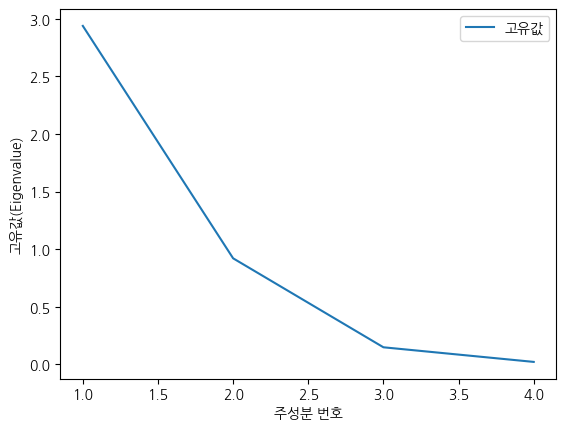

In [15]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], 
         label="고유값")
# 그래프 label, legend 설정
plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

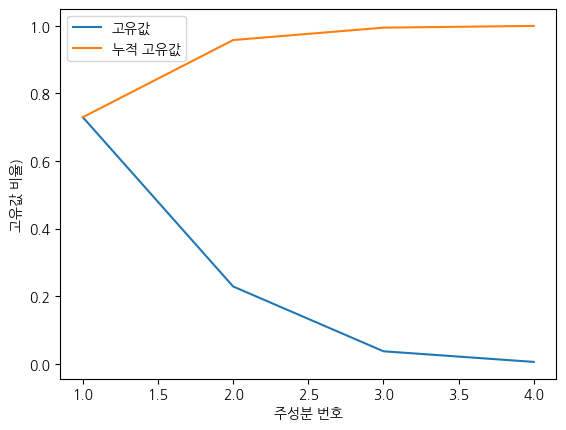

In [16]:
plt.plot(df_pca_stat["PrinNo"], 
         df_pca_stat["EigenValueRatio"], label="고유값")
# 누적된 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"], 
         df_pca_stat["CumEigenValueRatio"], label="누적 고유값")
plt.ylabel("고유값 비율)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

In [17]:
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1, \
                            columns = ["Prin1","Prin2","Prin3","Prin4"])], axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4
0,SEPAL_LENGTH,-0.521,-0.377,0.720,0.261
1,SEPAL_WIDTH,0.269,-0.923,-0.244,-0.124
2,PETAL_LENGTH,-0.580,-0.024,-0.142,-0.801
3,PETAL_WIDTH,-0.565,-0.067,-0.634,0.524


1주성분은 PETAL_LENGTH와 PETAL_WIDH와 강한 음의 연관성을 갖는다.<br>
2주성분은 SEPAL_WIDTH와 매우 강한 음의 연관성을 가지며 SEPAL_WIDTH가 다음으로 강한 연관성을 가지나 그 정도가 크지 않다.

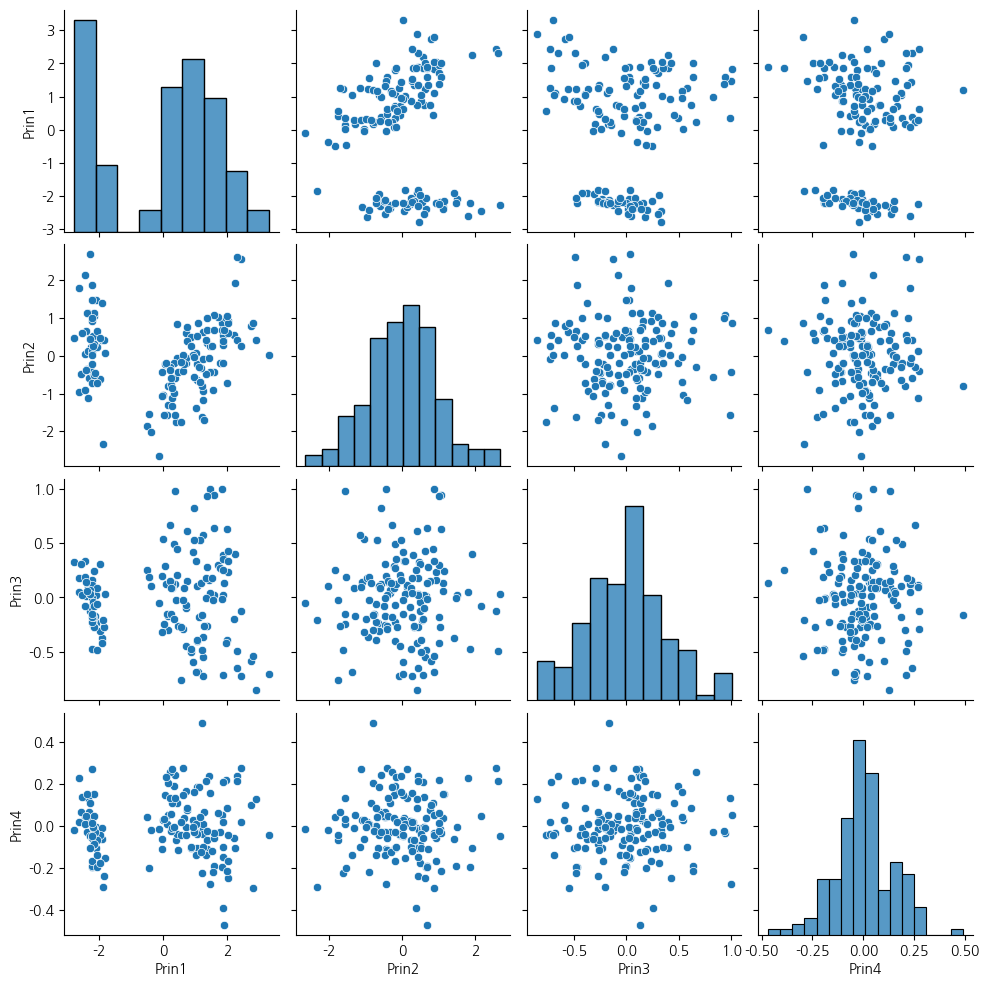

In [18]:
sns.pairplot(df_pca)

In [19]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4
Prin1,1.0,0.0,-0.0,-0.0
Prin2,0.0,1.0,0.0,-0.0
Prin3,-0.0,0.0,1.0,-0.0
Prin4,-0.0,-0.0,-0.0,1.0


주성분은 서로 독립적이며 상관계수가 0인 걸 확인할 수 있다.

In [20]:
df_raw_x_const = sm.add_constant(df_raw_x)

reg_model = sm.OLS(df_raw_y, df_raw_x_const)

reg_model = reg_model.fit()

print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                SPECIES   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     484.5
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           8.46e-83
Time:                        19:58:17   Log-Likelihood:                 17.437
No. Observations:                 150   AIC:                            -24.87
Df Residuals:                     145   BIC:                            -9.821
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1865      0.205      0.910   

In [21]:
df_scaled_const = sm.add_constant(df_scaled)
reg_model = sm.OLS(df_raw_y, df_scaled_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                SPECIES   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     484.5
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           8.46e-83
Time:                        19:58:17   Log-Likelihood:                 17.437
No. Observations:                 150   AIC:                            -24.87
Df Residuals:                     145   BIC:                            -9.821
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0000      0.018     55.899   

In [50]:
x_var = ["Prin1", "Prin2"]

df_pca_const = sm.add_constant(df_pca[x_var])

reg_model = sm.OLS(df_raw_y, df_pca_const)

reg_model = reg_model.fit()

print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                SPECIES   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     610.4
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           6.30e-72
Time:                        21:06:49   Log-Likelihood:                -15.139
No. Observations:                 150   AIC:                             36.28
Df Residuals:                     147   BIC:                             45.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000      0.022     45.297      0.0

전체 설명변수를 이용한 모델보다 2개 주성분을 이용한 회귀모델의 설명력이 대략 4% 정도 저하된다. <br>
주성분 회귀분석의 회귀계수 중 Prin2에서 유의하지 않으므로 주성분을 1개로 줄인다.

In [51]:
x_var = ["Prin1"]

df_pca_const = sm.add_constant(df_pca[x_var])

reg_model = sm.OLS(df_raw_y, df_pca_const)

reg_model = reg_model.fit()

print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                SPECIES   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     1227.
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           1.57e-73
Time:                        21:09:33   Log-Likelihood:                -15.236
No. Observations:                 150   AIC:                             34.47
Df Residuals:                     148   BIC:                             40.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000      0.022     45.421      0.0

2개일 때와 비교하여 설명력이 떨어지지 않았다. <br>
또한 주성분이 유의한 것을 확인할 수 있다.

## 시계열 분석

In [23]:
df_raw = pd.read_csv("../실습파일/2. Big Data 분석/df_USD.csv", parse_dates=['APPL_DATE'])
df_raw

,APPL_DATE,STD_RATE
0,2016-01-01,1178
1,2016-01-02,1178
2,2016-01-03,1178
3,2016-01-04,1184
4,2016-01-05,1185
...,...,...
86,2016-03-27,1169
87,2016-03-28,1169
88,2016-03-29,1162
89,2016-03-30,1153


Text(0, 0.5, 'std_rate')

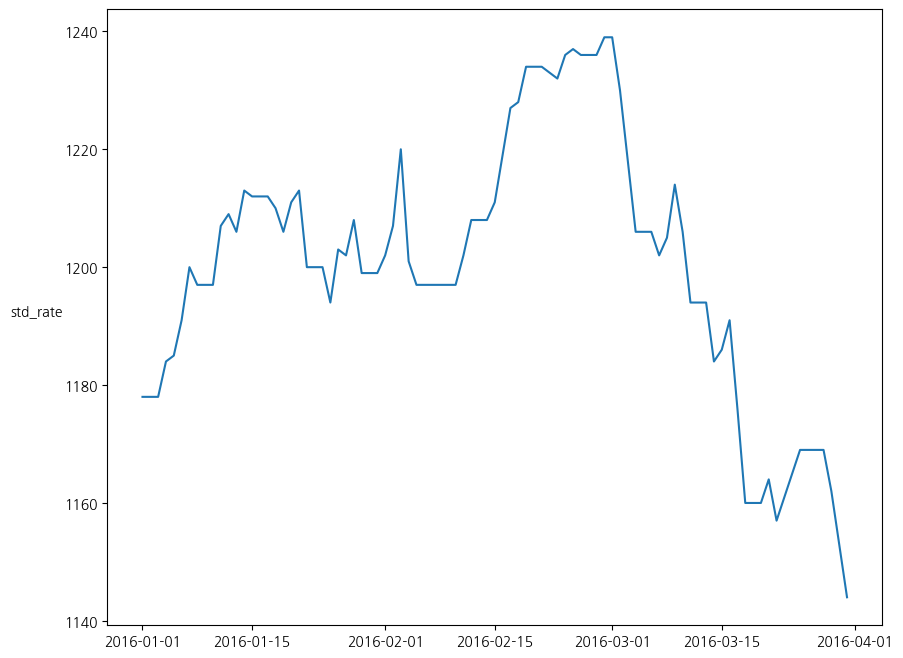

In [24]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10,8))
ax.plot('APPL_DATE', "STD_RATE", data = df_raw)
ax.set_ylabel('std_rate', rotation = 0, labelpad = 20)


In [25]:
df = df_raw.set_index("APPL_DATE")
df

,STD_RATE
APPL_DATE,
2016-01-01,1178
2016-01-02,1178
2016-01-03,1178
2016-01-04,1184
2016-01-05,1185
...,...
2016-03-27,1169
2016-03-28,1169
2016-03-29,1162


In [26]:
train_size = 0.9
len_idx = len(df_raw.index)

mask = (np.arange(len_idx) / len_idx) < train_size
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [27]:
df_train = df[mask]
df_test = df[~mask]
print("shape of train data: {}".format(df_train.shape))
print("shape of test data: {}".format(df_test.shape))

shape of train data: (82, 1)
shape of test data: (9, 1)


In [28]:
df_train

,STD_RATE
APPL_DATE,
2016-01-01,1178
2016-01-02,1178
2016-01-03,1178
2016-01-04,1184
2016-01-05,1185
...,...
2016-03-18,1160
2016-03-19,1160
2016-03-20,1160


<Axes: xlabel='APPL_DATE'>

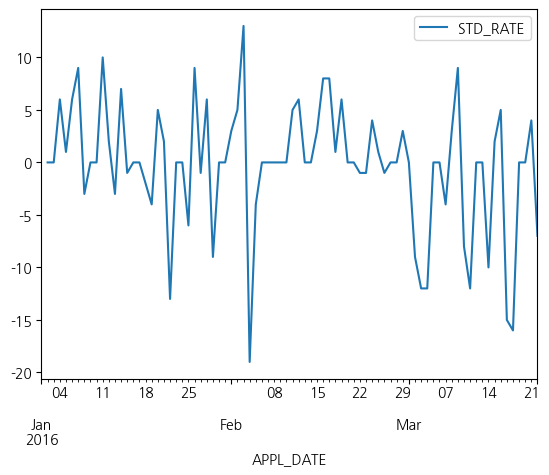

In [29]:
df_diff = df_train - df_train.shift(1)
df_diff.plot()

시간의 흐름에 영향을 덜 받지만 정상성이 만족스럽지 않으므로 차분을 한번 더 진행한다.

<Axes: xlabel='APPL_DATE'>

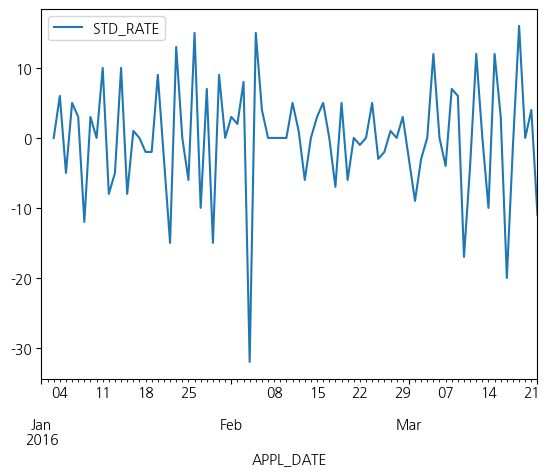

In [30]:
df_diff2 = df_train - 2 * (df_train.shift(1)) + (df_train.shift(2))
df_diff2.plot()

(2차 차분으로) 시간에 따른 경향성을 가지지 않는 정상성을 만족하는 결과를 얻었다.

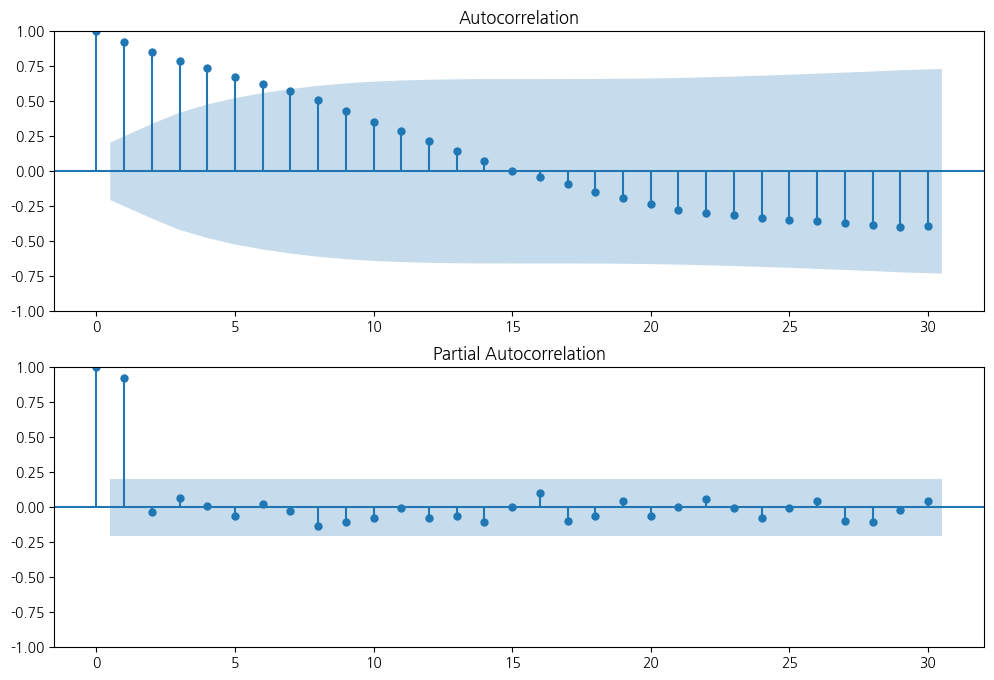

In [31]:
# 243 Page
# 자기회귀 최대 p기간 지정
lag_size = 30
fig = plt.figure(figsize=(12,8))
# acf 그래프를 그릴 공간 생성
ax1 = fig.add_subplot(211)
# 자기상관 함수 그래프 plot_acf 함수 사용 
fig = plot_acf(df["STD_RATE"], lags=lag_size, ax=ax1) # ["STD_RATE"] 생략 가능
# pacf 그래프를 그릴 공간 생성
ax2 = fig.add_subplot(212)
# 부분 자기상관 함수 그래프 plot_pacf 함수 사용 
fig = plot_pacf(df["STD_RATE"], lags=lag_size, ax=ax2) # ["STD_RATE"] 생략 가능

ACF는 지속적으로 감소하고 p=13 시점에서 양에서 음으로 변하고, PACF는 p=1 시점에서 0.9보다 크고 이후 급격히 감소하는 걸 확인할 수 있다.<br>
따라서 p=1, q=0 모델이 적당하다고 판단하여 ARMA(1,0)으로 진행한다.

In [52]:
ts_model_cny = ARIMA(df_train, order = (1, 2, 0))

ts_result_cny = ts_model_cny.fit()
print(ts_result_cny.summary())

                               SARIMAX Results                                
Dep. Variable:               STD_RATE   No. Observations:                   82
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -274.804
Date:                Wed, 06 Mar 2024   AIC                            553.608
Time:                        21:22:14   BIC                            558.372
Sample:                    01-01-2016   HQIC                           555.518
                         - 03-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3764      0.124     -3.047      0.002      -0.618      -0.134
sigma2        56.2767      7.107      7.919      0.000      42.348      70.206
Ljung-Box (L1) (Q):                   2.21   Jarque-

/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['ax', 'plot_insample']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


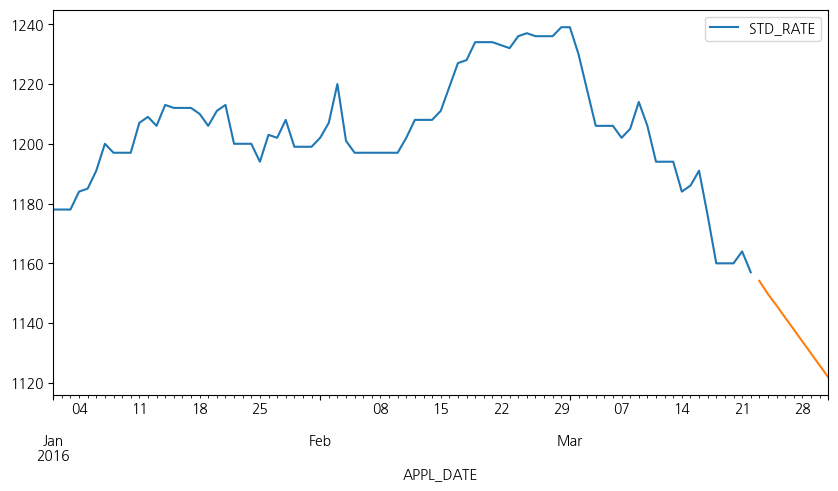

In [53]:
start_time = df_test.index.min()
end_time = df_test.index.max()
fig, ax = plt.subplots(figsize = (10, 5))

ax = df_train.plot(ax = ax)

fig = ts_result_cny.predict(start=start_time, end=end_time, ax = ax, plot_insample=False).plot()

2016년 3월 23일 ~ 31일까지의 예측값이 지속적으로 감소할 것으로 예측한다.

In [34]:
start_time = pd.to_datetime("2016-01-03")  # 차분=2 -> 시작일자 + 2 이후부터 예측값 생성됨
y_pred = ts_result_cny.predict(start=start_time, end=end_time, typ= 'levels')

df_merge = df  # 실제값 저장
df_merge["예측값"]=y_pred  # 예측값 저장 및 변수명 지정
df_merge.head()

/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,STD_RATE,예측값
APPL_DATE,,
2016-01-01,1178,NaN
2016-01-02,1178,NaN
2016-01-03,1178,1178.029066
2016-01-04,1184,1178.000000
2016-01-05,1185,1187.741796


<Axes: xlabel='APPL_DATE'>

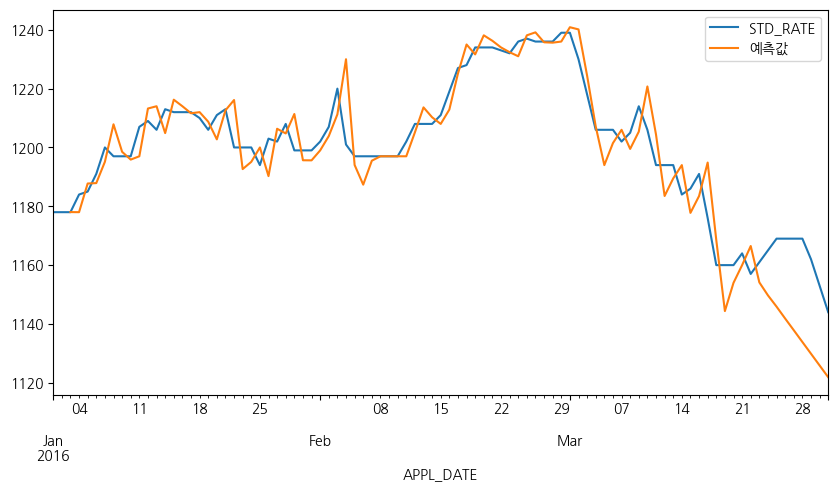

In [35]:
df_merge.plot( y=["STD_RATE","예측값"], figsize=(10,5))

모델 훈련구간이 실제값 대비 지연이 크게 되고 있는 걸로 확인되며 예측 구간에서 오차가 크게 나타났다.

In [36]:
ts_model = auto_arima(df_train, max_p=3, max_q=3, d=2, 
                      trace=True, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=524.467, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=563.701, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=553.608, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=521.789, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=523.560, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=523.412, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=524.524, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.331 seconds


최적의 모수가 0,2,1로 나오는 걸 확인할 수 있다.

In [37]:
ts_model_cny = ARIMA(df_train, order = (0, 2, 1))

ts_result_cny = ts_model_cny.fit()
print(ts_result_cny.summary())

                               SARIMAX Results                                
Dep. Variable:               STD_RATE   No. Observations:                   82
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -258.895
Date:                Wed, 06 Mar 2024   AIC                            521.789
Time:                        19:58:20   BIC                            526.553
Sample:                    01-01-2016   HQIC                           523.699
                         - 03-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9220      0.053    -17.368      0.000      -1.026      -0.818
sigma2        36.9957      4.740      7.805      0.000      27.705      46.286
Ljung-Box (L1) (Q):                   0.06   Jarque-

/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


앞선 ARIMA(0,2,1) 모델의 계수 유의성을 확인했을 때 모두 유의한 걸 확인할 수 있다.

/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['ax', 'plot_insample']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


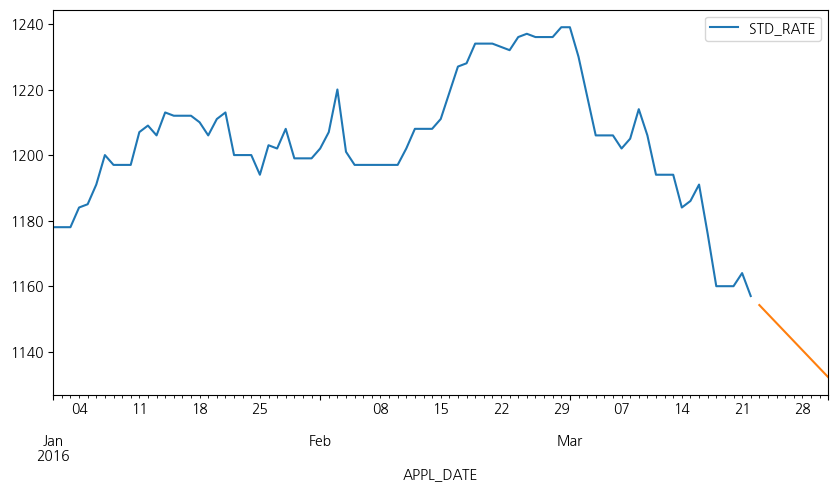

In [38]:
start_time = df_test.index.min() 
end_time = df_test.index.max()
fig, ax = plt.subplots(figsize = (10, 5))


ax = df_train.plot(ax = ax)

fig = ts_result_cny.predict(start=start_time, end=end_time, ax = ax, plot_insample=False).plot()

이전과 마찬가지로 3월 23일 이후로 지속적으로 감소할 것으로 예측할 수 있다.

In [39]:
start_time = pd.to_datetime("2016-01-03")  # 차분=2 -> 시작일자 + 2 이후부터 예측값 생성됨
y_pred = ts_result_cny.predict(start=start_time, end=end_time, typ= 'levels')
df_merge = df  # 실제값 저장
df_merge["예측값"]=y_pred  # 예측값 저장 및 변수명 지정
df_merge.head()

/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,STD_RATE,예측값
APPL_DATE,,
2016-01-01,1178,NaN
2016-01-02,1178,NaN
2016-01-03,1178,1178.040179
2016-01-04,1184,1178.020024
2016-01-05,1185,1186.035078


<Axes: xlabel='APPL_DATE'>

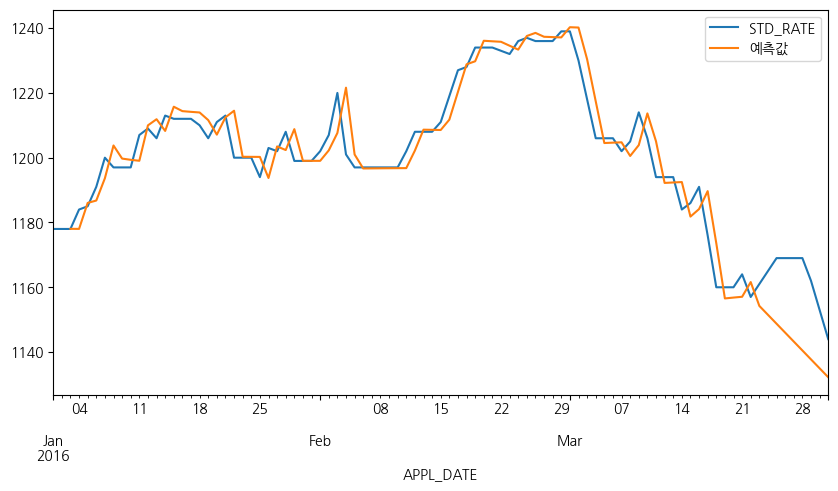

In [40]:
df_merge.plot( y=["STD_RATE","예측값"], figsize=(10, 5))

최적의 모수로 ARIMA 모델을 변경하여 실험을 진행하였지만 여전히 예측 구간에서 실제값 대비 지연(lag) 현상이 확인되었다. <br>
이를 해결하기 위해서는 더 많은 데이터를 활용하거나 다른 시계열 분석을 위한 모델을 사용하는 방법이 있을 것으로 생각된다.